In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file.

df=pd.read_csv('covid.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
# checking col datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [4]:
#Describe
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


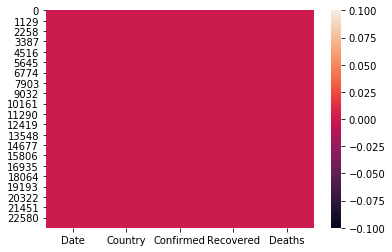

In [5]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [6]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Deaths       0
Recovered    0
Confirmed    0
Country      0
Date         0
dtype: int64

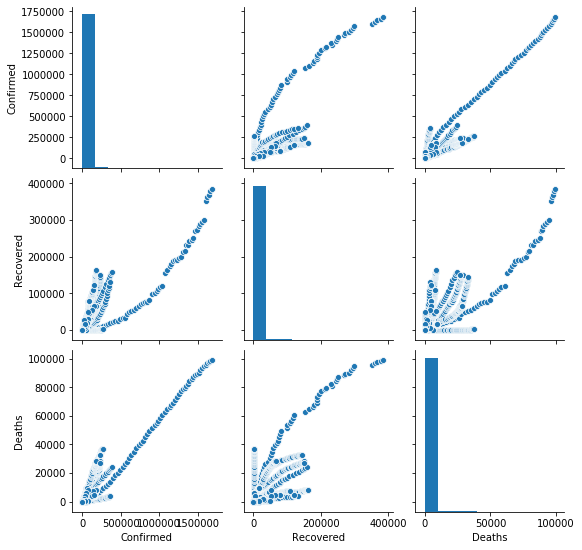

In [7]:
sns.pairplot(df)

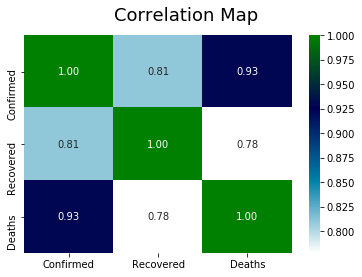

In [8]:
#plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True, cmap="ocean_r", fmt=".2f")  # seaborn has very simple solution for heatmap

plt.suptitle("Correlation Map", fontsize=18)

plt.show()   # whitest and greenest are most correlated

<Figure size 432x288 with 0 Axes>

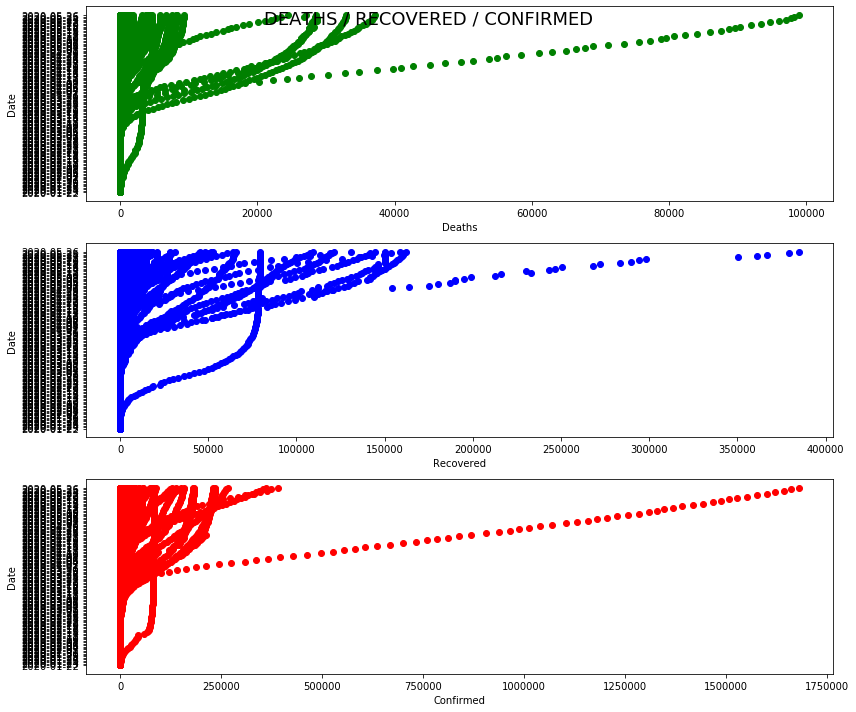

In [9]:
plt.clf()  # to clear our plots before re-creating them.

plt.figure(figsize=(12,10));  # to make it easy to divide and see

plt.subplot(3,1,1);      # 1st row 
#plt.scatter(df['Deaths'], df['Country'], color='g');
plt.scatter(df['Deaths'], df['Date'], color='g');
plt.xlabel("Deaths");
plt.ylabel("Date");

plt.subplot(3,1,2);     # 2nd row
plt.scatter(df['Recovered'], df['Date'], color='b');
plt.xlabel("Recovered");
#plt.ylabel("Country");
plt.ylabel("Date");

plt.subplot(3,1,3);     # 3rd row
plt.scatter(df['Confirmed'], df['Date'], color='r');
plt.xlabel("Confirmed");
#plt.ylabel("Country");
plt.ylabel("Date");


plt.suptitle("DEATHS / RECOVERED / CONFIRMED",fontsize=18)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Country']= le.fit_transform(df['Country']) 
df['Date']= le.fit_transform(df['Date']) 
df

,Date,Country,Confirmed,Recovered,Deaths
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,0,0,0
3,0,3,0,0,0
4,0,4,0,0,0
...,...,...,...,...,...
23683,125,183,429,365,3
23684,125,184,9,6,1
23685,125,185,249,10,49
23686,125,186,920,336,7


In [11]:
# Setting x by excluding Date column which is y here
x=df.drop(['Date'],axis=1)
x

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x=scale.fit_transform(x)

In [13]:
# Settting y as Class column
y=df['Date']
y

0          0
1          0
2          0
3          0
4          0
        ... 
23683    125
23684    125
23685    125
23686    125
23687    125
Name: Date, Length: 23688, dtype: int32

In [14]:
max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  92  is  0.03889346819735018


In [15]:
# Setting the test x & y values
# Setting the train x & y values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=92)

In [16]:
train_x.shape

(17766, 4)

In [17]:
train_y.shape

(17766,)

In [18]:
test_x.shape

(5922, 4)

In [19]:
test_y.shape

(5922,)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
KNN=KNeighborsRegressor(n_neighbors=6)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=6)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=92)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [22]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [23]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
Mean absolute error 31.549706299539096
Mean squared error 1355.4391185456172
Root Mean absolute error 36.816288766599186
Score:  0.907042025791285


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 31.549706299539096
Mean squared error 1355.4391185456172
Root Mean absolute error 36.816288766599186
Score:  0.15416639291590206


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 31.549706299539096
Mean squared error 1355.4391185456172
Root Mean absolute error 36.816288766599186
Score:  0.039263750286362975


----

In [24]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,90.704203
1,SVR,15.416639
2,LinearRegression,3.926375
3,DecisionTreeRegressor,89.620619
4,Lasso,3.926502
5,Ridge,3.926375
6,ElasticNet,3.926743
7,RandomForestRegressor,91.409705
8,AdaBoostRegressor,69.536787
9,GradientBoostingRegressor,78.056989


# I choose RandomForestRegressor Model based on the stats above.

In [25]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RF,"RF_Covid.pkl")

['RF_Happiness.pkl']